In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data analysis of Magic the Gathering card dataset

The data can be found at https://mtgjson.com/downloads/all-files/.  
cards.csv contains information on all cards printed during MTG's history since 1993 until today.  
The file lists all printed cards not all cards, a card may appear multiple times because it has been reprinted with certain alterations.  


In [2]:
default_df = pd.read_csv("./cards.csv")

C:\Users\Damien\AppData\Local\Temp\ipykernel_5256\1720733143.py:1: DtypeWarning: Columns (3,11,18,22,26,29,53,59,60,67,68,77,78,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  default_df = pd.read_csv("./cards.csv")


## Who are the most productive artists ?

Here a graph showing the number of cards illustrated by each artist.  
I prefered to seperate the cards illustrated by one artist and the cards illustrated by two artist.  



Text(0, 0.5, '')

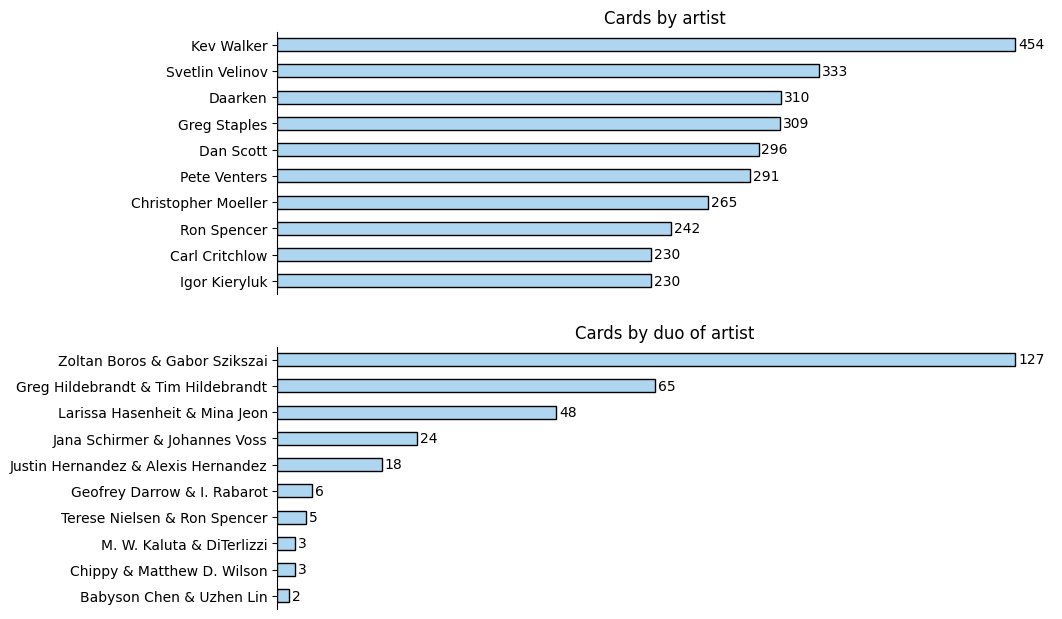

In [3]:
df = default_df[["name", "artist"]].dropna().drop_duplicates()


# separate solo and duo, by applying a mask
df["mask"] = df["artist"].str.contains("&")  # & present if duo
df_solo = df[~df["mask"]].value_counts("artist", ascending=True)[-10:]
df_duo = df[df["mask"]].value_counts("artist", ascending=True)[-10:]


fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(10, 7.5)


for axe in axes:  # remove the plot borders
    for side in ["top", "bottom", "right"]:
        axe.spines[f"{side}"].set_visible(False)


solo_plot = df_solo.plot(kind="barh", ax=axes[0], rot=0, edgecolor="k", color="#AED6F1")
solo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
solo_plot.bar_label(solo_plot.containers[0], padding=2)
solo_plot.set_title("Cards by artist")
solo_plot.set_ylabel("")


duo_plot = df_duo.plot(kind="barh", ax=axes[1], rot=0, edgecolor="k", color="#AED6F1")
duo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
duo_plot.bar_label(duo_plot.containers[0], padding=2)
duo_plot.set_title("Cards by duo of artist")
duo_plot.set_ylabel("")

## What are the 10 most reprinted cards ?

Here is a graph showing the 10 cards having the most printed version.  
I preferred to exclude the lands because they will obviously be in the top.  
I also added the number of unique illustrations that can be found among all the printed versions.  


Text(0, 0.5, '')

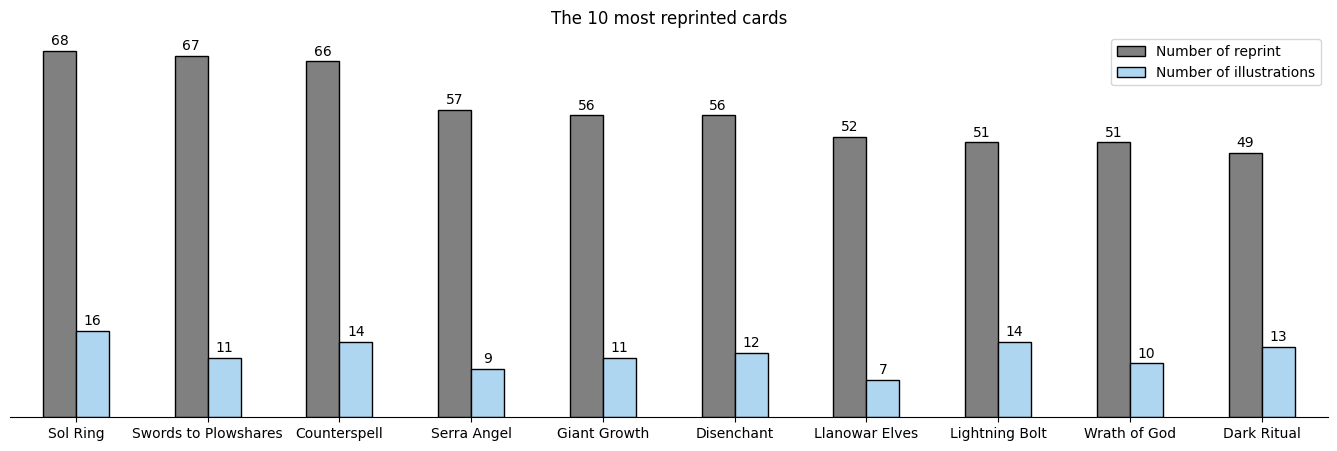

In [4]:
df = default_df[["name", "types", "scryfallIllustrationId"]]


df = df.loc[(df["types"] != "Land")]  # exclude all land


temp_df = pd.DataFrame()
temp_df["Number of reprint"] = df["name"].value_counts()
temp_df["Number of illustrations"] = (
    df[["name", "scryfallIllustrationId"]]
    .dropna()
    .drop_duplicates()
    .groupby("name")
    .count()
    .sort_values("scryfallIllustrationId", ascending=False)
)


df = temp_df[:10].sort_values("Number of reprint", ascending=False)


fig, axes = plt.subplots()
fig.set_size_inches(17, 5, 5)
# remove the plot borders
for side in ["top", "right", "left"]:
    axes.spines[f"{side}"].set_visible(False)


plot = df.plot(
    kind="bar",
    rot=0,
    edgecolor="k",
    ax=axes,
    color={"Number of illustrations": "#AED6F1", "Number of reprint": "grey"},
)
# add labels next to containers
for container in plot.containers:
    plot.bar_label(container, padding=2)
plot.tick_params("y", which="both", left=False, labelleft=False)
plot.set_title("The 10 most reprinted cards")
plot.set_xlabel("")
plot.set_ylabel("")

## What is the proportion of original cards ?

Here is a graph showing the percentage of cards being a reprint of another card in the set.


Text(0, 0.5, '')

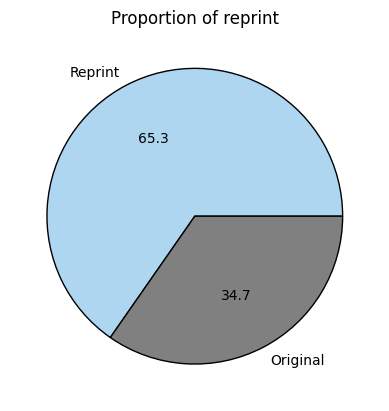

In [5]:
df = default_df[["name", "isReprint"]].drop_duplicates().dropna()


df = df.value_counts("isReprint").rename({0: "Reprint", 1: "Original"})


plot = df.plot(
    kind="pie",
    autopct="%.1f",
    wedgeprops={"edgecolor": "k"},
    colors=["#AED6F1", "grey"],
)
plot.set_title("Proportion of reprint")
plot.set_ylabel("")